## Wine Quality Predictor (Classification)

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The two datasets will be merged to facilitate analysis, with the objective of developing a predictive model for wine quality and type using physicochemical tests.

Source of dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

## 1. Import relevant libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
%load_ext watermark
warnings.filterwarnings("ignore")

## 2. Load dataset

In [3]:
red_df = pd.read_csv('winequality-red.csv')

In [4]:
red_df.insert(loc = 0,column = 'type',value = 'Red')

In [5]:
red_df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1488,Red,5.6,0.54,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5
1313,Red,7.0,0.36,0.21,2.3,0.086,20.0,65.0,0.99558,3.40,0.54,10.1,6
545,Red,9.1,0.47,0.49,2.6,0.094,38.0,106.0,0.99820,3.08,0.59,9.1,5
1479,Red,8.2,0.28,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5
1041,Red,6.9,0.49,0.19,1.7,0.079,13.0,26.0,0.99547,3.38,0.64,9.8,6


In [6]:
white_df = pd.read_csv('winequality-white.csv')

In [7]:
white_df.insert(loc = 0,column = 'type',value = 'White',)

In [8]:
white_df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4590,White,6.4,0.33,0.30,7.2,0.041,42.0,168.0,0.99331,3.22,0.49,11.1,6
1695,White,7.2,0.21,0.33,3.0,0.036,35.0,132.0,0.99280,3.25,0.40,11.0,6
277,White,7.7,0.26,0.40,1.1,0.042,9.0,60.0,0.99150,2.89,0.50,10.6,5
1478,White,7.9,0.22,0.24,4.6,0.044,39.0,159.0,0.99270,2.99,0.28,11.5,6
4126,White,6.3,0.18,0.22,5.6,0.047,45.0,147.0,0.99383,3.09,0.54,10.0,5


In [9]:
# combining the both dataset
wine = pd.concat([red_df, white_df])
wine.reset_index(drop = True, inplace = True)

In [10]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,White,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,White,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,White,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,White,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 3. Exploratory Data Analysis

In [11]:
wine.shape

(6497, 13)

In [12]:
wine.isna().sum().sort_values(ascending = False)

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [14]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Correlation

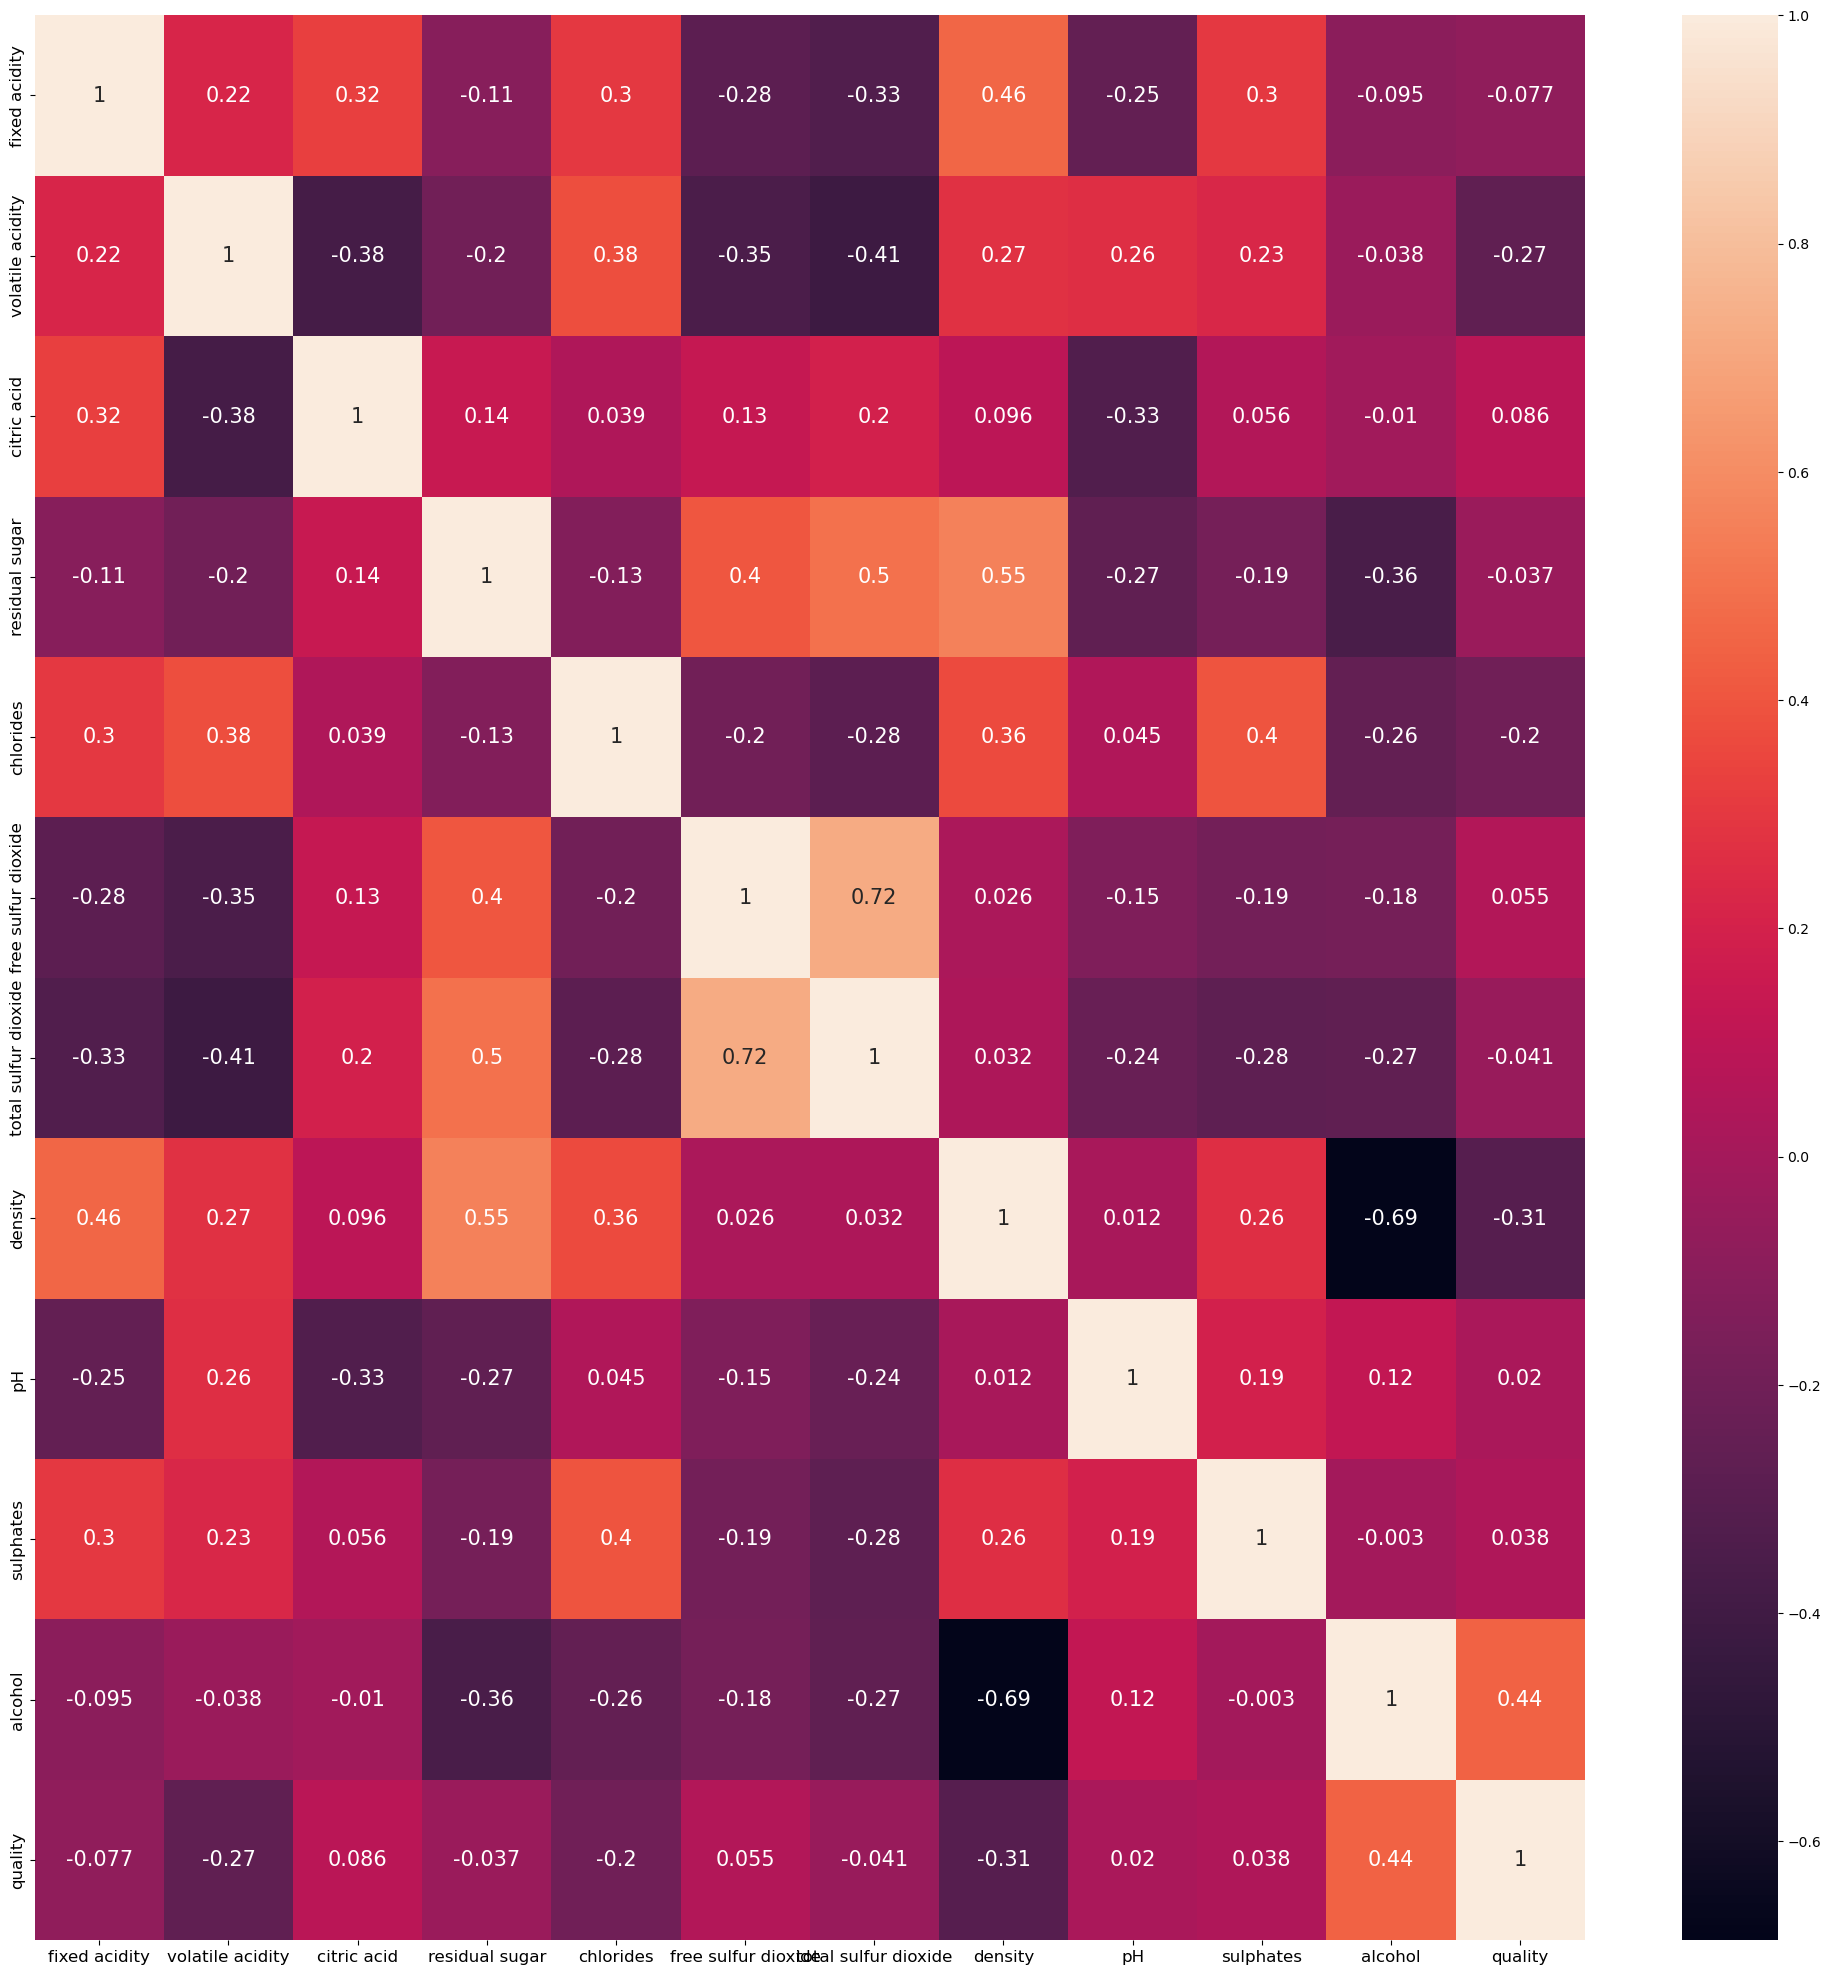

In [15]:
correlation = wine.corr()
# Plot correlation
plt.figure(figsize=(25, 25))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 15}
)
# Axis ticks size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

'Alcohol' exhibits the strongest correlation with the quality score, while 'Fixed Acidity' demonstrates the lowest correlation across all variables.

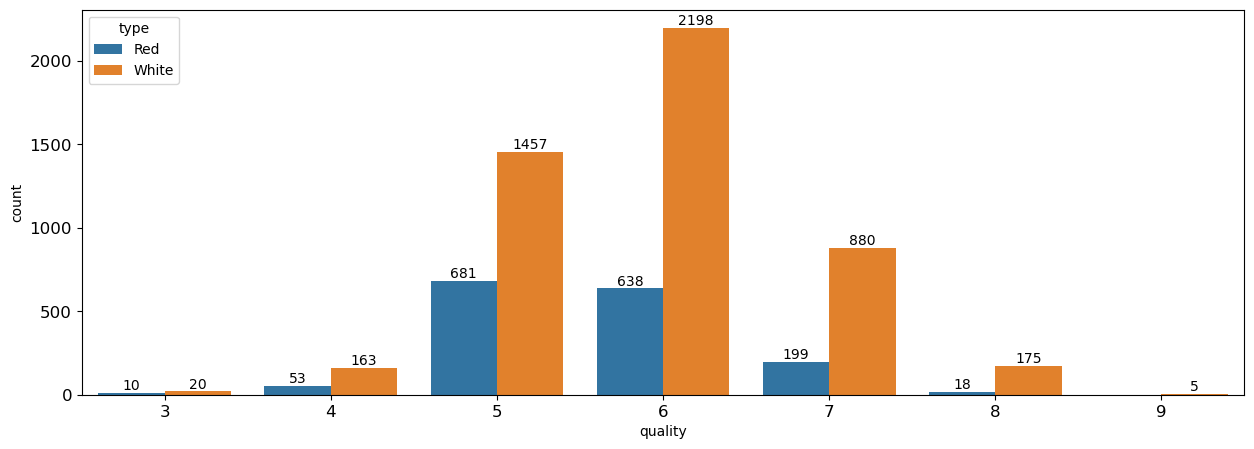

In [16]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot()
sns.countplot(data=wine, x="quality", hue="type", ax=ax)
for container in ax.containers:
    ax.bar_label(container)
# Axis ticks size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Count of the different quality in the dataset.

### Wine Distributions

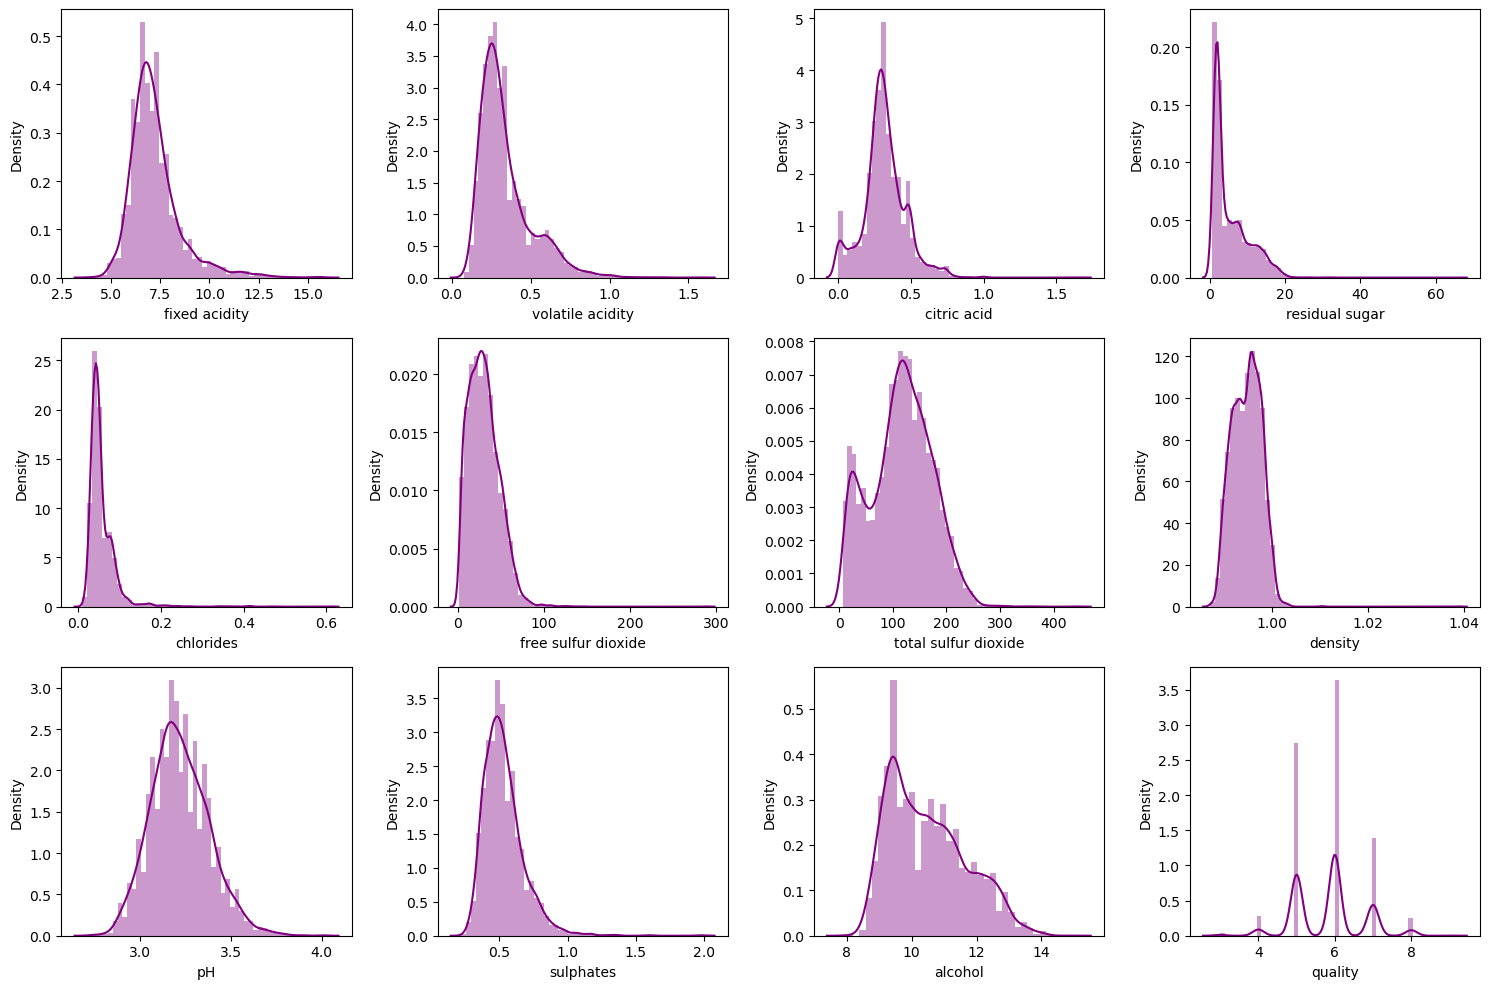

In [17]:
plt.figure(figsize = (15,10))

for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(wine[wine.columns[i]],color='purple')
    plt.tight_layout()

The distribution plots above indicate the presence of outliers in our dataset.

### 4. Data Preprocessing

In [18]:
# Making categorical classificaion for the response variable.
# Dividing wine quality as low, medium and high.

group_names=['Low','Medium','High']
bin = pd.cut(wine['quality'], 3, labels=group_names)
wine['quality'] = bin
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Low
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Low
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Medium
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,White,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Medium
6493,White,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Low
6494,White,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Medium
6495,White,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Medium


In [19]:
wine['quality'].value_counts()

Medium    3915
Low       2384
High       198
Name: quality, dtype: int64

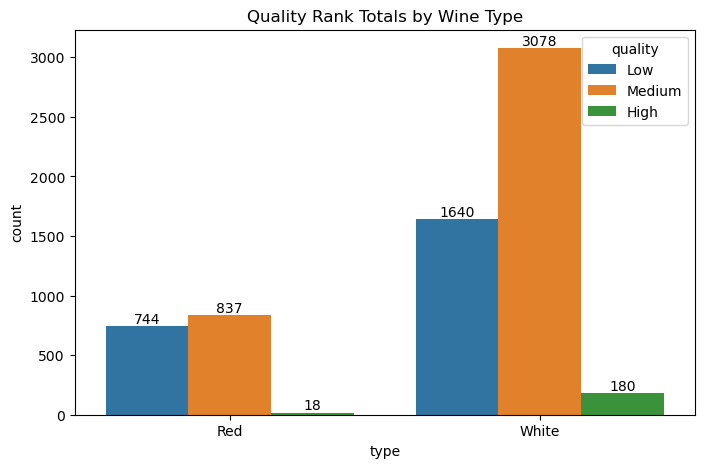

In [20]:
plt.figure(figsize=(8,5))
counts = sns.countplot(x = 'type', hue = 'quality', data = wine)
for container in counts.containers:
    counts.bar_label(container)
plt.title('Quality Rank Totals by Wine Type')    
plt.show()

In [21]:
quality = {"Low" : 0,"Medium": 1,"High" : 2}
wine["quality"] =  wine["quality"].map(quality)
wine.head()

type_ = {"Red" : 0, "White": 1}
wine["type"] =  wine["type"].map(type_)
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Splitting dataset into independent (X) and dependent (Y) variables to fit onto our models. After having done this we scaled the independent variables, this means that the data was transformed so that it all fits within a specific scale like, in this case, 0-1.
By scaling our variables, it will help compare different variables on equal footing while also improve the performance of our machine learning algorithms, as they often perform better with data that is in a common range

In [22]:
X = wine.drop(['quality'],axis=1)
Y = wine['quality']

In [23]:
X2 = wine.drop(['type'],axis=1)
Y2 = wine['type']

In [24]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(X)
X = pd.DataFrame(minmax_df, columns=X.columns)

In [25]:
minmax_df2 = scaler.fit_transform(X2)
X2 = pd.DataFrame(minmax_df2, columns = X2.columns)

#### Split Dataset

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [27]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.2, random_state = 0)

## 5. Classification Models for Wine Quality

In this project, my emphasis will be on utilizing three classification algorithms available in the sklearn library: 
>* Support Vector Classifier
>* Random Forest Classifier and
>* K-Neighbours Classifier

Let's create a function for generating confusion matrices for each model as we progress, enhancing the visual representation.

In [28]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Low','Medium','High']); ax.yaxis.set_ticklabels(['Low','Medium','High'])

### Support Vector Machine

In [29]:
svm = SVC()
svm.fit(X_train,Y_train)
accuracy = svm.score(X_test, Y_test)
print('Support Vector Accuracy:',(accuracy*100).round(2),'%')

Support Vector Accuracy: 72.0 %


#### Lets tune the model using GridSearchCV

In [30]:
svm_params = {'C':[0.1,1],
              'kernel':['linear', 'rbf'],
              'degree':[2,3,4],
              'decision_function_shape':['ovo', 'ovr'],
              'gamma':[0.1,1.0]}

svm_cv = GridSearchCV(svm,svm_params,cv=5)
svm_cv.fit(X_train, Y_train)
print("Best Parameters :",svm_cv.best_params_)
print("GridSearch Score:",(svm_cv.best_score_*100).round(2),'%')

Best Parameters : {'C': 1, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 1.0, 'kernel': 'rbf'}
GridSearch Score: 72.23 %


In [31]:
y_predict=svm_cv.best_estimator_.predict(X_test)

print("Tuned Support Vector Machine Model Accuracy:", 
     (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned Support Vector Machine Model Accuracy: 71.62 %


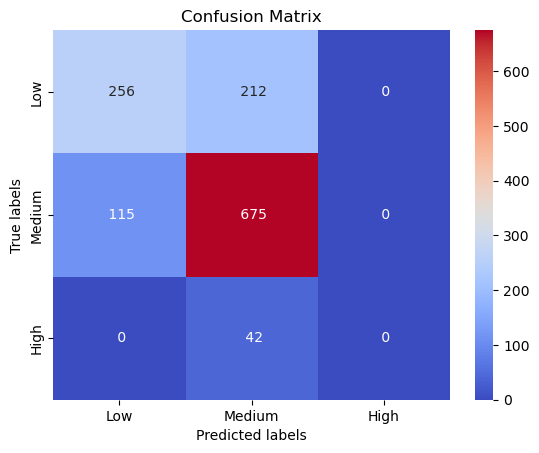

In [32]:
plot_confusion_matrix(Y_test,y_predict)

### Random Forest Model

In [33]:
forest = RandomForestClassifier()
forest.fit(X_train,Y_train)
accuracy = forest.score(X_test, Y_test)
print('Random Forest Accuracy:',(accuracy*100).round(2),'%')

Random Forest Accuracy: 81.54 %


#### Lets tune the model using GridSearchCV

In [34]:
forest_params = {'criterion':['gini','entropy'],
               'max_depth': ['None',4, 6, 8, 10, 12, 14],
               'min_samples_split': [4, 6, 8, 10, 12, 14],
               'min_samples_leaf': [5, 6, 7, 8 , 9, 10, 11, 12],
               'max_features': ['auto', 'sqrt']}

forest_cv = GridSearchCV(forest,forest_params,cv=5)
forest_cv.fit(X_train, Y_train)

print("Best Parameters :",forest_cv.best_params_)
print("GridSearch Score :",(forest_cv.best_score_*100).round(2),'%')

Best Parameters : {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 4}
GridSearch Score : 77.6 %


In [35]:
y_predict = forest_cv.best_estimator_.predict(X_test)
print("Tuned Random Forest Model Accuracy:", 
     (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned Random Forest Model Accuracy: 77.23 %


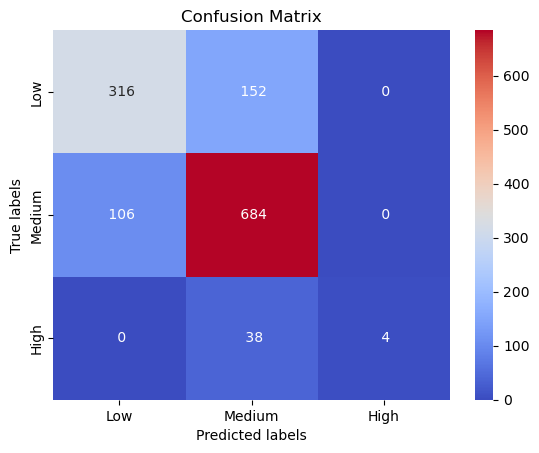

In [36]:
plot_confusion_matrix(Y_test,y_predict)

### K-Nearest-Neighbors 

In [37]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)
accuracy = KNN.score(X_test, Y_test)
print('KNN Model Accuracy:',(accuracy*100).round(2),'%')

KNN Model Accuracy: 71.0 %


#### Lets tune the model using GridSearchCV

In [38]:
knn_params = {'n_neighbors': list(range(1,50)),
              'weights':['uniform','distance'],
              'algorithm': ['auto','brute'],
              'p': [1,2]}

knn_cv = GridSearchCV(KNN,knn_params,cv=10)
knn_cv.fit(X_train, Y_train)
print("Best Parameters :",knn_cv.best_params_)
print("GridSearch Score :",(knn_cv.best_score_*100).round(2),'%')

Best Parameters : {'algorithm': 'auto', 'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
GridSearch Score : 79.85 %


In [39]:
y_predict=knn_cv.best_estimator_.predict(X_test)

print("Tuned K-Neighbors model accuracy:", 
     ( accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned K-Neighbors model accuracy: 78.46 %


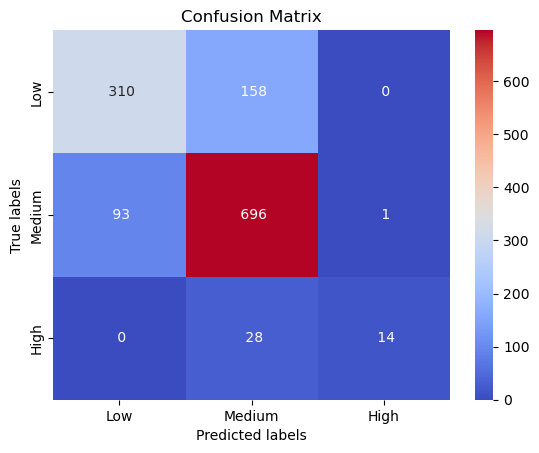

In [40]:
plot_confusion_matrix(Y_test,y_predict)

### Comparison

In [41]:
mods = {'SVM':[svm_cv.score(X_test, Y_test)],'Random Forest':[forest_cv.score(X_test, Y_test)],'KNN':[knn_cv.score(X_test, Y_test)]}
scores = pd.DataFrame.from_dict(mods,orient='index', columns=['Tuned Model'])
scores

,Tuned Model
SVM,0.716154
Random Forest,0.772308
KNN,0.784615


The best one to predict wine quality was the K-Nearest-Neigbors classifier after tuning.

## 6. Classification Model for Wine Type

In [42]:
def plot_confusion_matrix2(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Red','White']); ax.yaxis.set_ticklabels(['Red','White'])

### Support Vector Machine

In [43]:
svm = SVC()
svm.fit(X2_train,Y2_train)
svm_accuracy = svm.score(X2_test, Y2_test)
print('Support Vector Accuracy:',(svm_accuracy*100).round(2),'%')

Support Vector Accuracy: 99.46 %


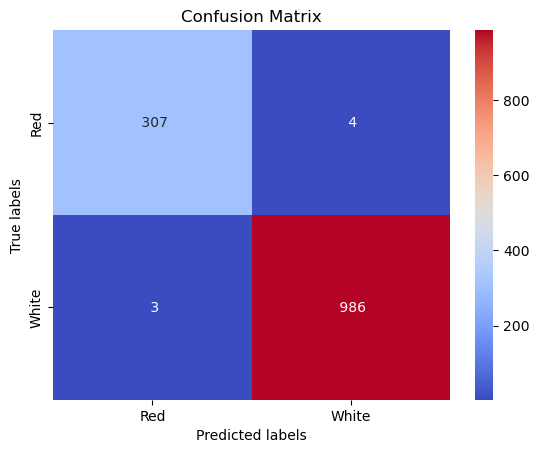

In [44]:
y_predict = svm.predict(X2_test)
plot_confusion_matrix2(Y2_test,y_predict)

### Random Forest

In [45]:
forest = RandomForestClassifier()
forest.fit(X2_train,Y2_train)
forest_accuracy = forest.score(X2_test, Y2_test)
print('Random Forest Accuracy:',(forest_accuracy*100).round(2),'%')

Random Forest Accuracy: 99.62 %


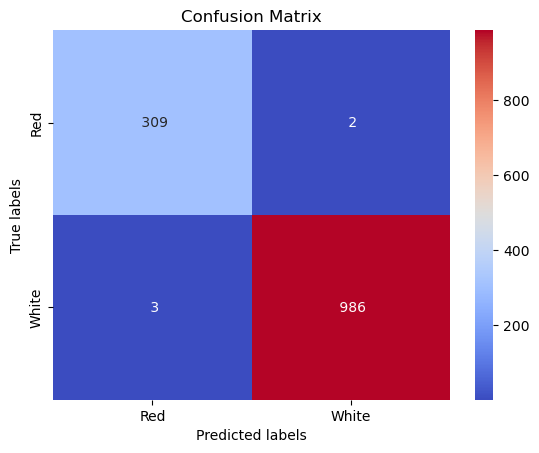

In [46]:
y_predict = forest.predict(X2_test)
plot_confusion_matrix2(Y2_test,y_predict)

### K-Nearest-Neighbors

In [47]:
KNN = KNeighborsClassifier()
KNN.fit(X2_train,Y2_train)
KNN_accuracy = KNN.score(X2_test, Y2_test)
print('KNN Model Accuracy:',(KNN_accuracy*100).round(2),'%')

KNN Model Accuracy: 99.08 %


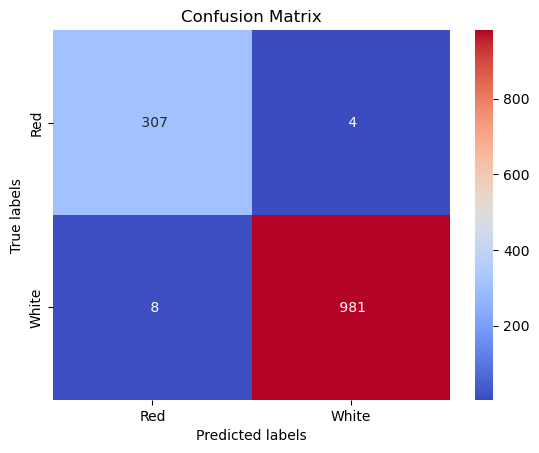

In [48]:
y_predict = KNN.predict(X2_test)
plot_confusion_matrix2(Y2_test,y_predict)

### Comparisons 

In [49]:
mods = {'SVM':[(svm_accuracy*100)],'Random Forest':[(forest_accuracy*100)],'KNN':[(KNN_accuracy*100)]}
types = pd.DataFrame.from_dict(mods,orient='index', columns=['Accuracy'])
types

,Accuracy
SVM,99.461538
Random Forest,99.615385
KNN,99.076923


The best model for predicting wine types is Random Forest Classifier with a score of 99.61 %.